# Importing the necessary packages

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

# Load the dataset

In [2]:
data = pd.read_csv('Coursera.csv')
print("Dataset has been read successfully")

Dataset has been read successfully


# EDA and data preprocessing

In [3]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [4]:
data.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

In [5]:
data.duplicated().sum()

98

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3424 non-null   object
 1   University          3424 non-null   object
 2   Difficulty Level    3424 non-null   object
 3   Course Rating       3424 non-null   object
 4   Course URL          3424 non-null   object
 5   Course Description  3424 non-null   object
 6   Skills              3424 non-null   object
dtypes: object(7)
memory usage: 214.0+ KB


In [9]:
data['University'].value_counts()

University
Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
University of Michigan                        101
Johns Hopkins University                      101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: count, Length: 184, dtype: int64

In [10]:
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: count, dtype: int64

In [11]:
data = data[data['Difficulty Level']!='Not Calibrated']
data['Difficulty Level'].value_counts()

Difficulty Level
Beginner        1406
Advanced         991
Intermediate     823
Conversant       154
Name: count, dtype: int64

In [12]:
data['Course Rating'].value_counts()

Course Rating
4.7               696
4.6               588
4.8               579
4.5               377
4.4               231
4.9               172
4.3               153
4.2               119
5                  89
4.1                85
Not Calibrated     80
4                  49
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: count, dtype: int64

In [13]:
data = data[data['Course Rating']!='Not Calibrated']
data['Course Rating'] = data['Course Rating'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else 0.0)
data['Course Rating'].value_counts()

Course Rating
4.7    696
4.6    588
4.8    579
4.5    377
4.4    231
4.9    172
4.3    153
0.0    153
4.2    119
4.1     85
3.8     24
3.9     20
3.6     18
3.7     18
3.5     17
3.4     13
3.2      9
3.3      6
2.9      6
2.6      2
2.8      2
2.4      2
3.1      1
2.5      1
1.9      1
2.3      1
Name: count, dtype: int64

In [14]:
data['Course URL'].value_counts()

Course URL
https://www.coursera.org/learn/write-a-feature-length-screenplay-for-film-or-television    1
https://www.coursera.org/learn/fitting-statistical-models-data-python                      1
https://www.coursera.org/learn/system-programming                                          1
https://www.coursera.org/learn/python-analysis                                             1
https://www.coursera.org/learn/disability-awareness                                        1
                                                                                          ..
https://www.coursera.org/learn/art-science-ml                                              1
https://www.coursera.org/learn/psychosocial-spiritual-aspects-palliative-care              1
https://www.coursera.org/learn/analyze-data-plotly-python                                  1
https://www.coursera.org/learn/data-collection-analytics-project                           1
https://www.coursera.org/learn/deploying-secure-kubernetes-

In [15]:
data['Skills'].value_counts()

Skills
Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art                                                                       1
multilevel model  linearity  modeling  Regression  statistical models  Computer Programming  Bayesian  Bayesian Statistics  General Statistics  Python Programming data-science probability-and-statistics             1
file system  System Programming  Computer Programming  generation  Mainframe  language  shell (computing)  ibm cobol  application layer  application service provider information-technology support-and-operations    1
Data Visualization  jpeg  dict  Python Programming  Data Analysis  web scraping  analysis  nest  Computer Programming  recursion computer-science software-development                                                 1
documents  education  Planning  Critical Thinking  college  disability studies  gratitude  resource  fundraising  Special Edu

In [16]:
data['Category'] = data['Course Description'].apply(lambda x: 'Film and Cinema Studies' if any(keyword in x.lower() for keyword in ['film', 'cinema', 'movie', 'director', 'screenplay']) else
                                                    'Stock Market Investing' if any(keyword in x.lower() for keyword in ['stock market', 'investing', 'financial market', 'trading', 'stocks']) else
                                                    'Financial Analysis' if any(keyword in x.lower() for keyword in ['financial analysis', 'financial modeling', 'financial planning']) else
                                                    'Real Estate Investment' if any(keyword in x.lower() for keyword in ['real estate', 'investment property', 'real estate finance']) else
                                                    'Cryptocurrency' if any(keyword in x.lower() for keyword in ['cryptocurrency', 'blockchain', 'bitcoin', 'ethereum']) else
                                                    'Social Media Marketing' if any(keyword in x.lower() for keyword in ['social media', 'marketing', 'digital marketing', 'social media strategy']) else
                                                    'Public Speaking' if any(keyword in x.lower() for keyword in ['public speaking', 'communication skills', 'presentation']) else
                                                    'Creative Writing' if any(keyword in x.lower() for keyword in ['creative writing', 'fiction writing', 'poetry', 'storytelling']) else
                                                    'Animation' if any(keyword in x.lower() for keyword in ['animation', 'cartooning', '3d animation', 'motion graphics']) else
                                                    'Business Analytics' if any(keyword in x.lower() for keyword in ['business analytics', 'data analysis', 'business intelligence', 'data visualization']) else
                                                    'Data Analytics' if any(keyword in x.lower() for keyword in ['data', 'sql', 'data science', 'data engineering', 'big data']) else
                                                    'ML/DL' if any(keyword in x.lower() for keyword in ['machine learning', 'deep learning', 'neural network', 'tensorflow', 'pytorch']) else
                                                    'Photography' if any(keyword in x.lower() for keyword in ['photography', 'photo editing', 'portrait photography', 'landscape photography']) else
                                                    'Astronomy' if any(keyword in x.lower() for keyword in ['astronomy', 'cosmology', 'space science', 'telescope']) else
                                                    'Philosophy' if any(keyword in x.lower() for keyword in ['philosophy', 'philosophical thought', 'ethical philosophy']) else
                                                    'Game Development' if any(keyword in x.lower() for keyword in ['game development', 'game design', 'video game programming']) else
                                                    '3D Modeling' if any(keyword in x.lower() for keyword in ['3d modeling', '3d design', '3d animation']) else
                                                    'Culinary Arts' if any(keyword in x.lower() for keyword in ['culinary arts', 'cooking techniques', 'baking']) else
                                                    'Political Science' if any(keyword in x.lower() for keyword in ['political science', 'government', 'international relations']) else
                                                    'Linguistics' if any(keyword in x.lower() for keyword in ['linguistics', 'language studies', 'language structure']) else
                                                    'Fitness Training' if any(keyword in x.lower() for keyword in ['fitness training', 'exercise', 'personal training']) else
                                                    'Digital Marketing' if any(keyword in x.lower() for keyword in ['digital marketing', 'online marketing', 'internet advertising']) else
                                                    'Photography' if any(keyword in x.lower() for keyword in ['photography', 'photo editing', 'portrait photography', 'landscape photography']) else
                                                    'Economics' if any(keyword in x.lower() for keyword in ['economics', 'microeconomics', 'macroeconomics']) else
                                                    'History' if any(keyword in x.lower() for keyword in ['history', 'historical studies', 'world history']) else
                                                    'Music' if any(keyword in x.lower() for keyword in ['music', 'music theory', 'musical composition']) else
                                                    'Language Learning' if any(keyword in x.lower() for keyword in ['language learning', 'language acquisition', 'linguistic studies']) else
                                                    'Health and Wellness' if any(keyword in x.lower() for keyword in ['health', 'wellness', 'fitness']) else
                                                    'Engineering' if any(keyword in x.lower() for keyword in ['engineering', 'civil engineering', 'electrical engineering']) else
                                                    'Design' if any(keyword in x.lower() for keyword in ['design', 'graphic design', 'ux/ui design']) else
                                                    'Literature and Writing' if any(keyword in x.lower() for keyword in ['literature', 'writing', 'creative writing']) else
                                                    'Science' if any(keyword in x.lower() for keyword in ['science', 'physics', 'chemistry']) else
                                                    'Technology' if any(keyword in x.lower() for keyword in ['technology', 'computer science', 'programming']) else
                                                    'Mathematics' if any(keyword in x.lower() for keyword in ['mathematics', 'calculus', 'algebra']) else
                                                    'Language and Communication' if any(keyword in x.lower() for keyword in ['language', 'communication', 'linguistics']) else
                                                    'Other' if any(keyword in x.lower() for keyword in ['other', 'miscellaneous', 'varied', 'diverse', 'assorted', 'various', 'general']) else 'Other')


# Data Visualization
## As data has been cleaned and processed now we can move on with the next part that is data visualization

In [17]:
import matplotlib.pyplot as plt

## No of courses under each difficulty level

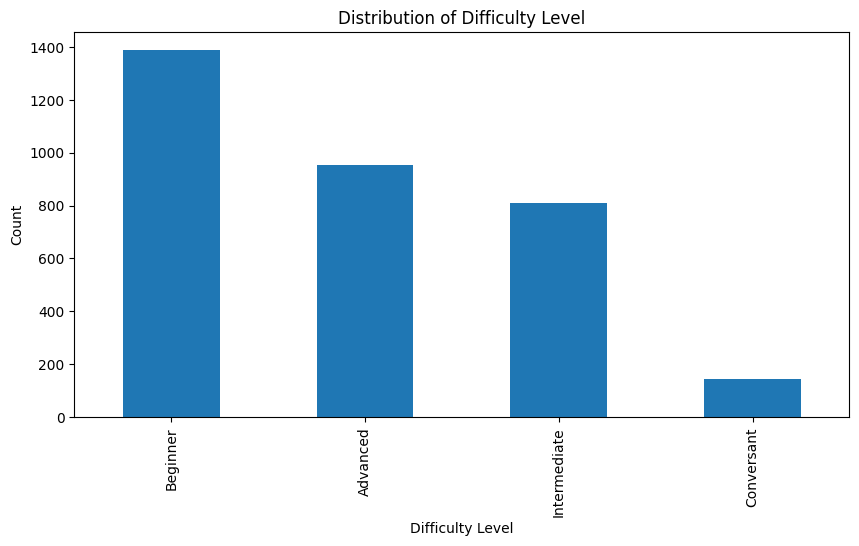

In [18]:
# Plotting the distribution of difficulty level
plt.figure(figsize=(10,5))
plt.title('Distribution of Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
data['Difficulty Level'].value_counts().plot(kind='bar')
plt.show()

## Distribution of course ratings

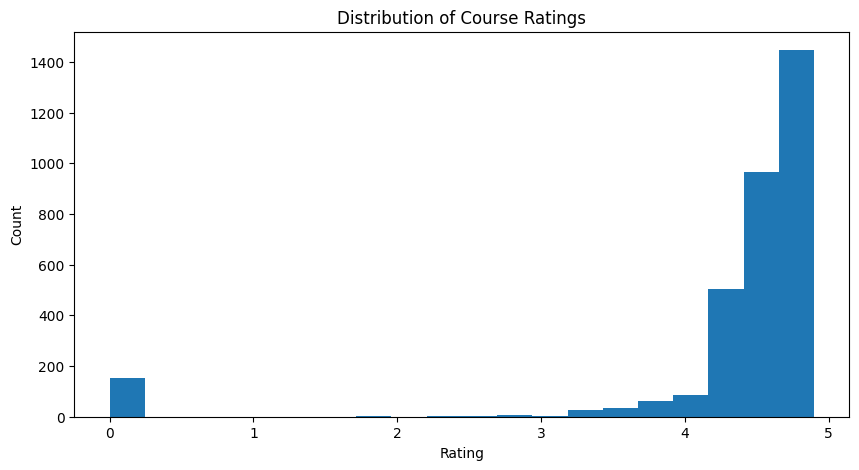

In [19]:
plt.figure(figsize=(10,5))
plt.hist(data['Course Rating'],bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Encoding categorical values

In [18]:
label_encoder = LabelEncoder()
data['Difficulty Level'] = label_encoder.fit_transform(data['Difficulty Level'])

In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
text_features = tfidf_vectorizer.fit_transform(data['Course Description'] + ' ' + data['Skills'])

# Model building

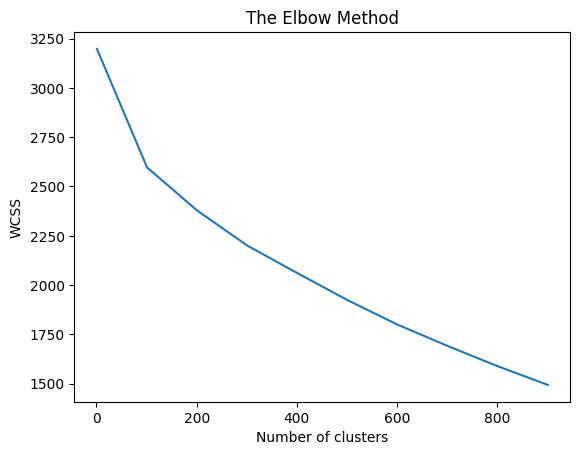

In [22]:
# build kmeans model for 1 to 1000 clusters with a step value of 100 and calculate the wccs score and find the elbow point using line plot
wcss = []
for i in range(1,1000,100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(text_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,1000,100),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=500, init='k-means++', max_iter=900, n_init=10, random_state=0)
kmeans.fit(text_features)
data['Cluster'] = kmeans.fit_predict(text_features)

In [21]:
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Category,Cluster
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,1,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Film and Cinema Studies,100
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,1,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Data Analytics,28
2,Silicon Thin Film Solar Cells,�cole Polytechnique,0,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Film and Cinema Studies,191
3,Finance for Managers,IESE Business School,3,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Social Media Marketing,138
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,1,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Data Analytics,52


In [22]:
X = text_features
y = data['Course Rating'] >= data['Course Rating'].median()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The recommender function

In [23]:
data.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills', 'Category', 'Cluster'],
      dtype='object')

In [24]:
def recommend_kmeans(course_index):
    # print(data.iloc[course_index])
    cluster = data['Cluster'][course_index]
    recommended_courses = data[(data['Cluster'] == cluster) & (data['Course Rating'] > 0)]
    return recommended_courses



In [27]:
# Assuming the user input is stored in a variable called 'user_input'
user_input = input("Enter your search query: ")

result_index = data[data['Course Name'].str.contains(user_input, case=False)].index
if not result_index.empty:
    first_index = result_index[0]
    # print(data.loc[first_index])
else:
    print("No matching results found.")

# print(first_index)

recommendations = recommend_kmeans(first_index)

# Displaying recommendations as a dataframe
df_recommendations = pd.DataFrame(recommendations)
# df_recommendations.sort_values(by='Difficulty Level', ascending=True, inplace=True)
df_recommendations.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Category,Cluster
86,Project Planning and Machine Learning,University of Colorado Boulder,1,4.4,https://www.coursera.org/learn/industrial-iot-...,This course can also be taken for academic cre...,Machine Learning Algorithms Planning interne...,Data Analytics,363
887,Machine Learning Algorithms: Supervised Learni...,Alberta Machine Intelligence Institute,3,4.7,https://www.coursera.org/learn/machine-learnin...,This course takes you from understanding the f...,classification algorithms Regression decisio...,Data Analytics,363
2250,Data for Machine Learning,Alberta Machine Intelligence Institute,1,4.4,https://www.coursera.org/learn/data-machine-le...,This course is all about data and how it is cr...,General Statistics evaluation Deep Learning ...,Data Analytics,363
2538,Introduction to Applied Machine Learning,Alberta Machine Intelligence Institute,3,4.7,https://www.coursera.org/learn/machine-learnin...,This course is for professionals who have hear...,Algorithms Machine Learning Algorithms Appli...,Business Analytics,363
3471,Optimizing Machine Learning Performance,Alberta Machine Intelligence Institute,1,4.5,https://www.coursera.org/learn/optimize-machin...,This course synthesizes everything your have l...,project Deep Learning Strategy mathematical...,Data Analytics,363
